In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression

In [67]:
# File to Load
diabetes_dataset_to_load = "Resources/diabetes_prediction_dataset.csv"

# Read the Diabetes Data File
diabetes_df = pd.read_csv(diabetes_dataset_to_load)
untouched_df = diabetes_df

In [68]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [69]:
# Display the data table for preview
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [70]:
# Raw Data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [71]:
# check for null values
diabetes_df.dropna(how='any', axis=0)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [72]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [73]:
male_df = diabetes_df[diabetes_df['gender']=='Male']
female_df = diabetes_df[diabetes_df['gender']=='Female']
other_df = diabetes_df[diabetes_df['gender']=='Other']

# male_df
female_df
# other_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Summary statistics for each variable

In [74]:
statistical_var = ['age','bmi','HbA1c_level','blood_glucose_level']

column_var = ['gender','hypertension', 'heart_disease','smoking_history','diabetes']

In [75]:
diabetes_df[statistical_var].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [76]:
diabetes_df[column_var].describe()

,hypertension,heart_disease,diabetes
count,100000.00000,100000.000000,100000.000000
mean,0.07485,0.039420,0.085000
std,0.26315,0.194593,0.278883
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,1.00000,1.000000,1.000000


In [77]:
mean = diabetes_df.groupby(['bmi'])['age'].mean()
median = diabetes_df.groupby(['bmi'])['age'].median()
var = diabetes_df.groupby(['bmi'])['age'].var()
std = diabetes_df.groupby(['bmi'])['age'].std()
sem = diabetes_df.groupby(['bmi'])['age'].sem()

bmi_age_df = pd.DataFrame({'Mean Age':mean, 'Median Age ':median, 'Age Variance':var, 'Age Std.Dev':std, 'Age Std Err':sem})

bmi_age_df 

,Mean Age,Median Age,Age Variance,Age Std.Dev,Age Std Err
bmi,,,,,
10.01,44.00,44.00,2592.0,50.911688,36.0
10.08,38.00,38.00,NaN,NaN,NaN
10.14,11.00,11.00,NaN,NaN,NaN
10.19,39.00,39.00,NaN,NaN,NaN
10.21,0.48,0.48,NaN,NaN,NaN
...,...,...,...,...,...
88.72,45.00,45.00,NaN,NaN,NaN
88.76,80.00,80.00,NaN,NaN,NaN
91.82,38.00,38.00,NaN,NaN,NaN


# plotting variables to see the relationship

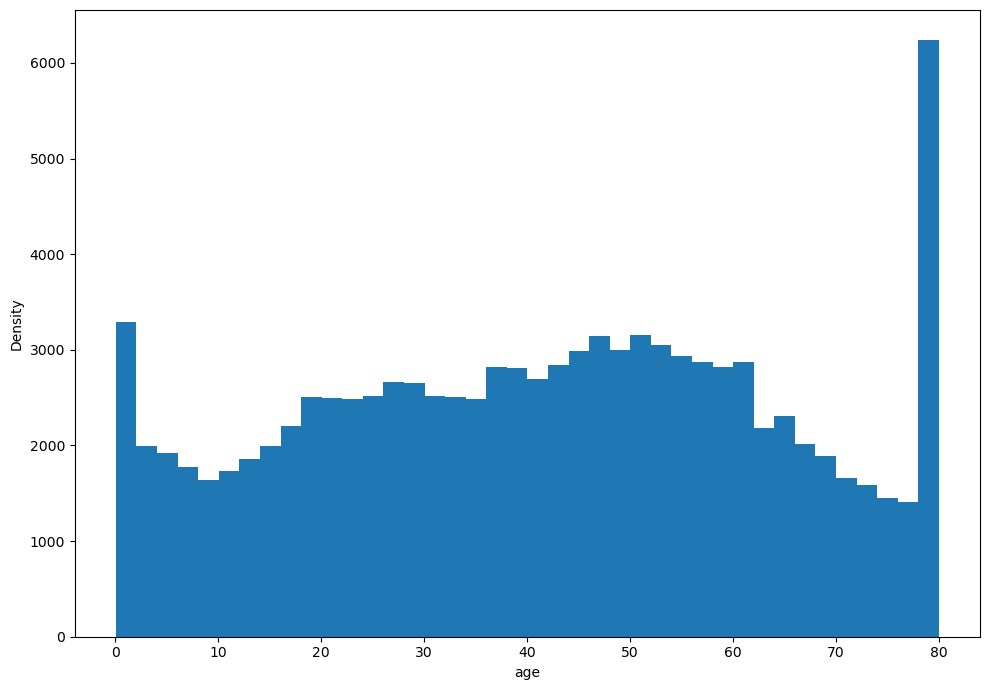

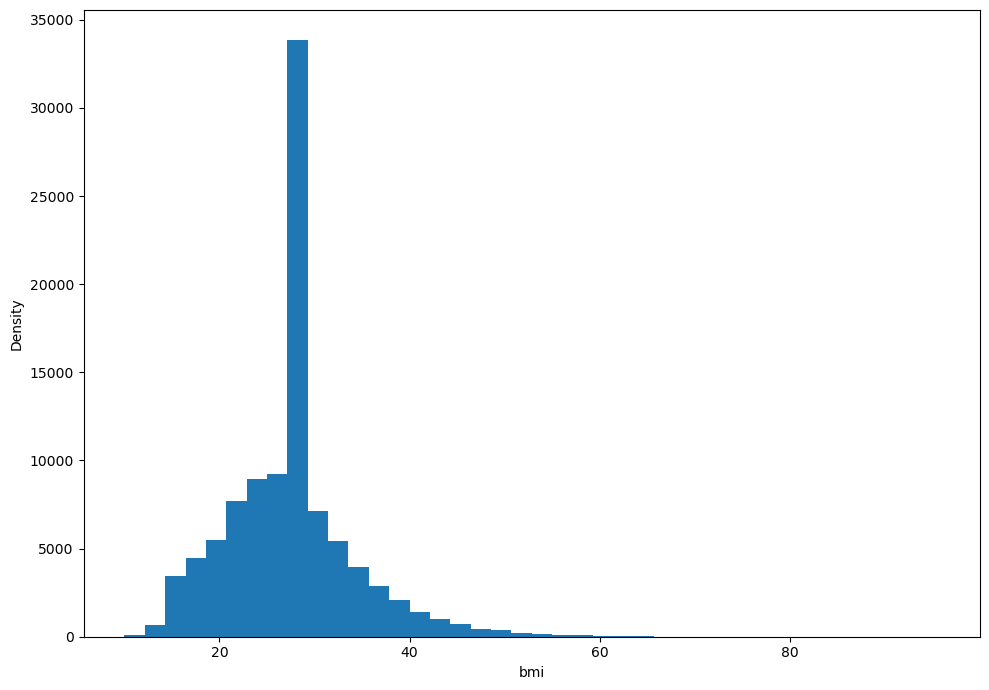

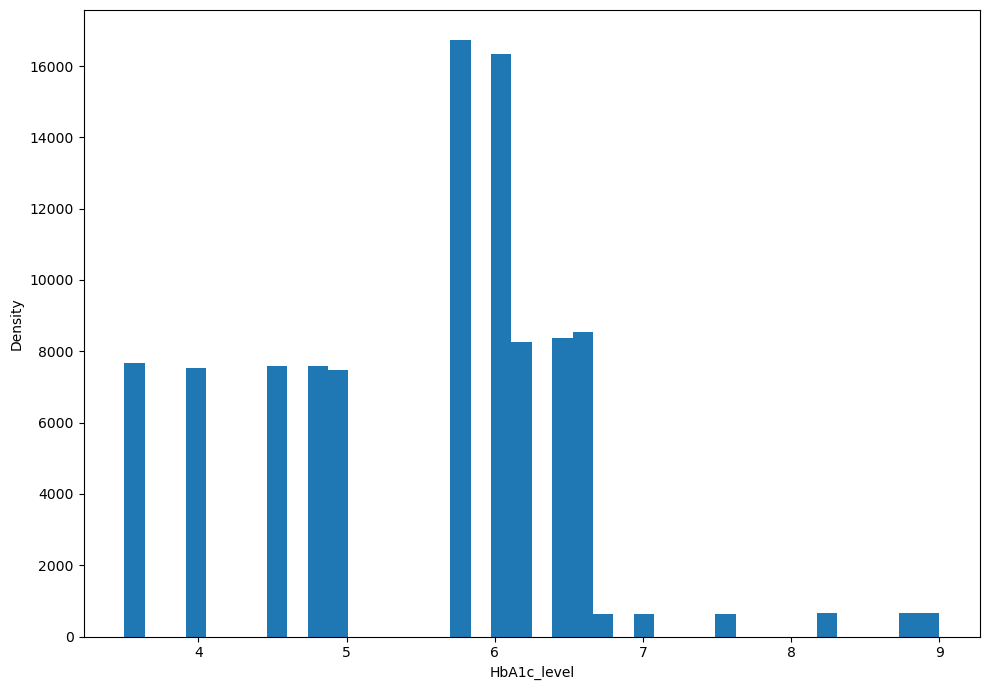

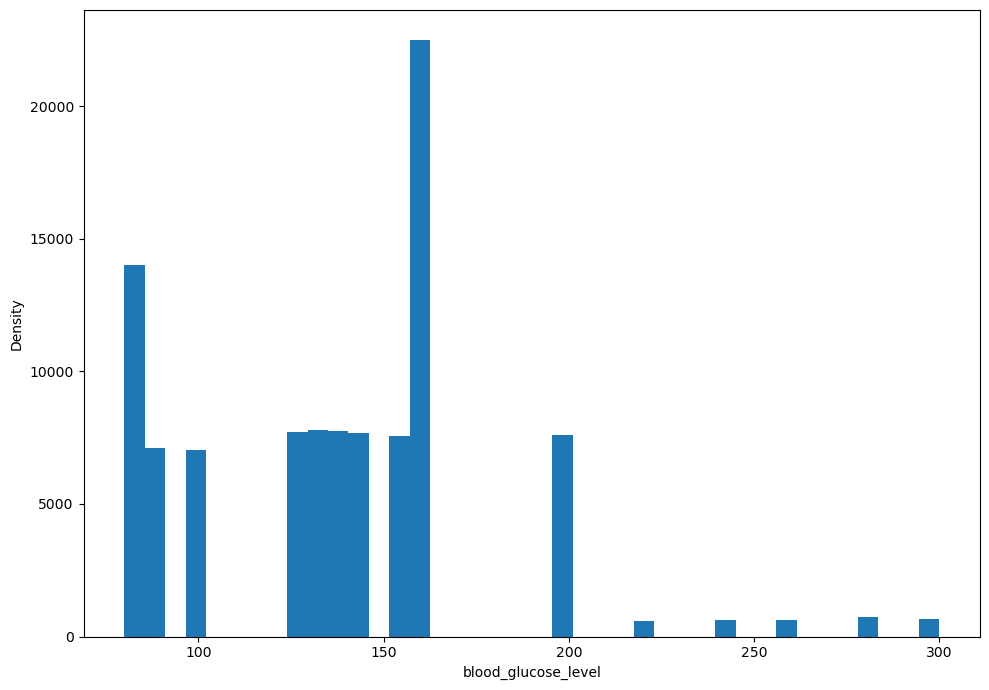

In [78]:
# histogram showing density 
for i in statistical_var:
    plt.figure(figsize=(10,7))
    plt.hist(diabetes_df[i],bins=40)
    plt.xlabel(i)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

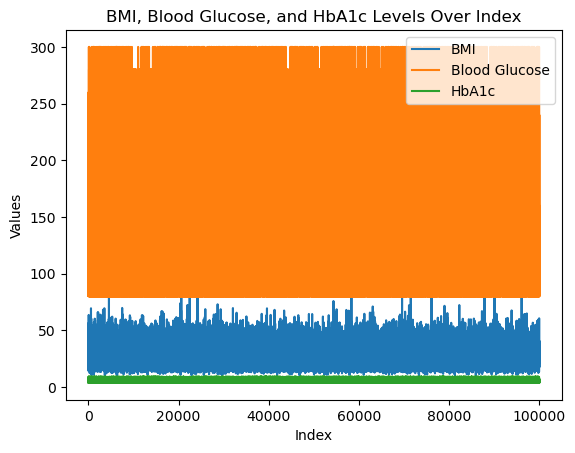

In [79]:
# Extract x-axis values (e.g., index)
x = diabetes_df.index

# Extract y-axis values (BMI, Blood Glucose, and HbA1c levels)
bmi = diabetes_df['bmi']
blood_glucose = diabetes_df['blood_glucose_level']
hba1c = diabetes_df['HbA1c_level']

# Stacked line chart comparing BMI, Blood Glucose, and HbA1c levels
plt.plot(x, bmi, label='BMI')
plt.plot(x, blood_glucose, label='Blood Glucose')
plt.plot(x, hba1c, label='HbA1c')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('BMI, Blood Glucose, and HbA1c Levels Over Index')

# Add legend
plt.legend()

# Show the plot
plt.show()

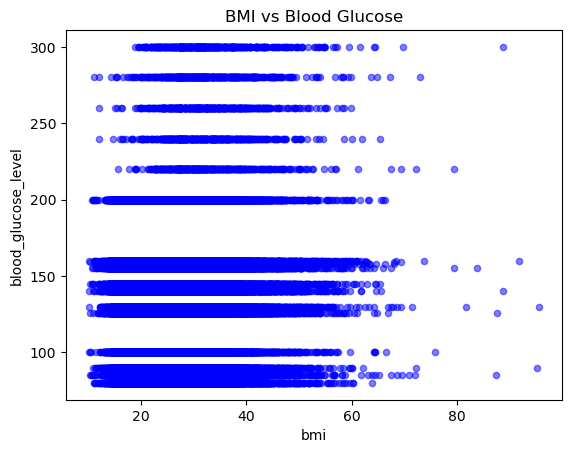

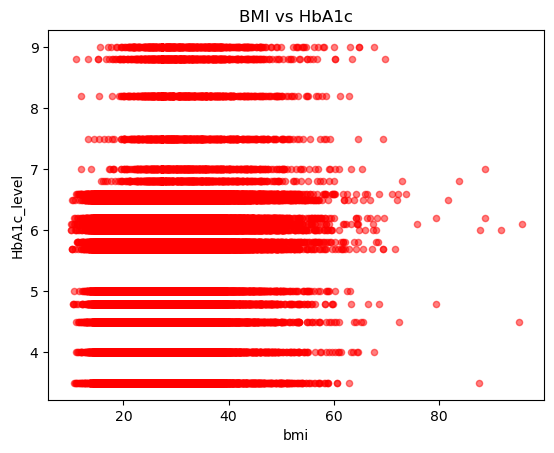

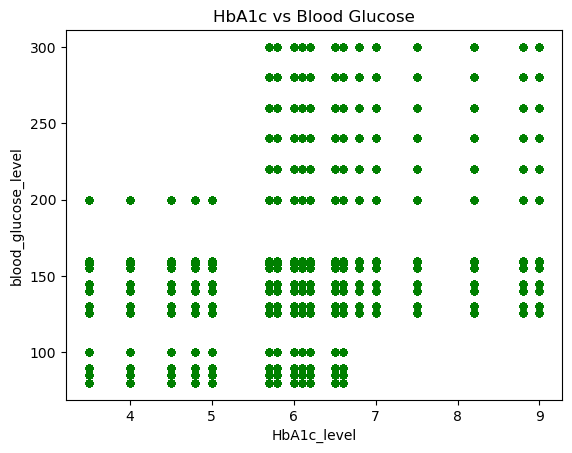

In [80]:
# Scatter plot comparing BMI to Blood Glucose
diabetes_df.plot(kind='scatter', x='bmi', y='blood_glucose_level', color='blue', alpha=0.5, title='BMI vs Blood Glucose')

# Scatter plot comparing BMI to HbA1c
diabetes_df.plot(kind='scatter', x='bmi', y='HbA1c_level', color='red', alpha=0.5, title='BMI vs HbA1c')

# Scatter plot comparing HbA1c to Blood Glucose
diabetes_df.plot(kind='scatter', x='HbA1c_level', y='blood_glucose_level', color='green', alpha=0.5, title='HbA1c vs Blood Glucose')

# Show the plots
plt.show()

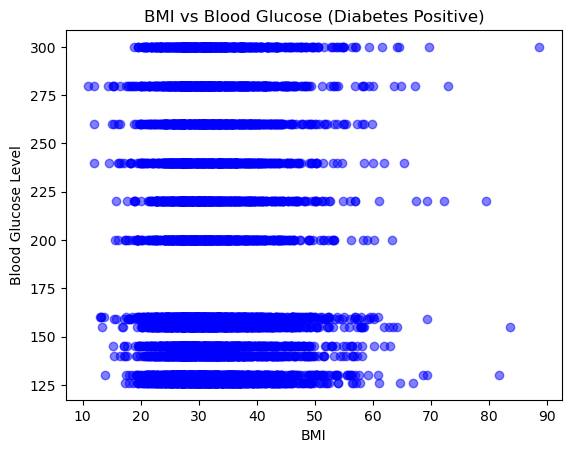

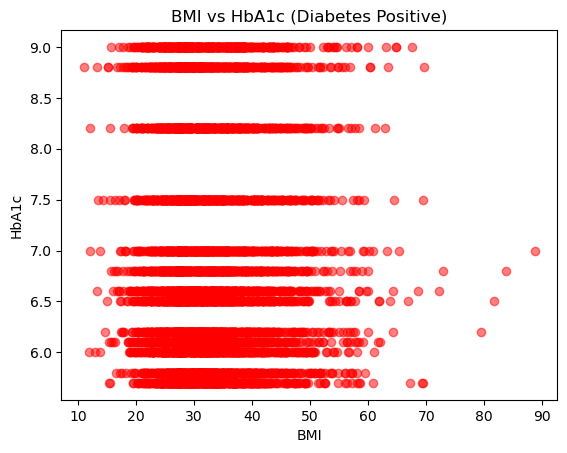

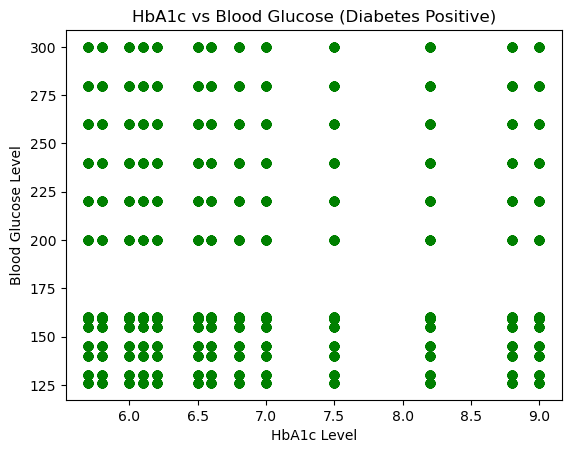

In [81]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', alpha=0.5)
plt.title('BMI vs Blood Glucose (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['HbA1c_level'], color='red', alpha=0.5)
plt.title('BMI vs HbA1c (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('HbA1c')
plt.show()

# Scatter plot comparing HbA1c to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['HbA1c_level'], diabetes_positive_df['blood_glucose_level'], color='green', alpha=0.5)
plt.title('HbA1c vs Blood Glucose (Diabetes Positive)')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

# Creating linear regressions and correlation coefficients for variables

In [82]:

# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi', 'HbA1c_level']]
y = diabetes_positive_df['blood_glucose_level']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)

# Print the intercept
print('Intercept:', model.intercept_)



Coefficients: [ 0.01606025 -0.52190212]
Intercept: 197.2003311040754


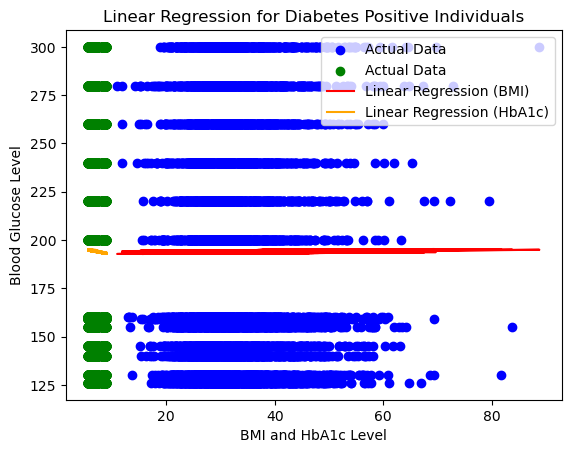

In [83]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi', 'HbA1c_level']]
y = diabetes_positive_df['blood_glucose_level']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')
plt.scatter(diabetes_positive_df['HbA1c_level'], diabetes_positive_df['blood_glucose_level'], color='green', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression (BMI)')
plt.plot(diabetes_positive_df['HbA1c_level'], model.predict(X), color='orange', label='Linear Regression (HbA1c)')

# Set labels and title
plt.xlabel('BMI and HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Diabetes Positive Individuals')
plt.legend()

# Show the plot
plt.show()

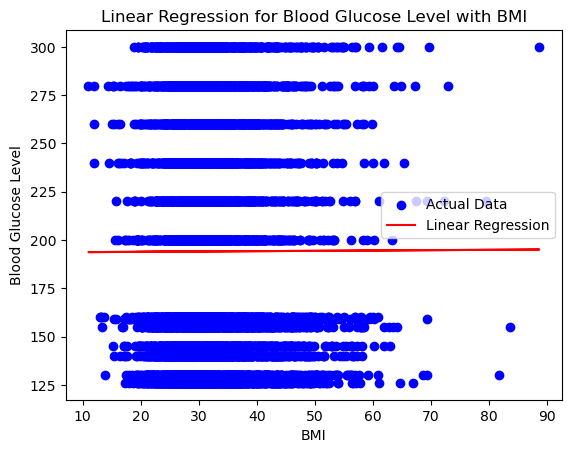

In [89]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['blood_glucose_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Blood Glucose Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

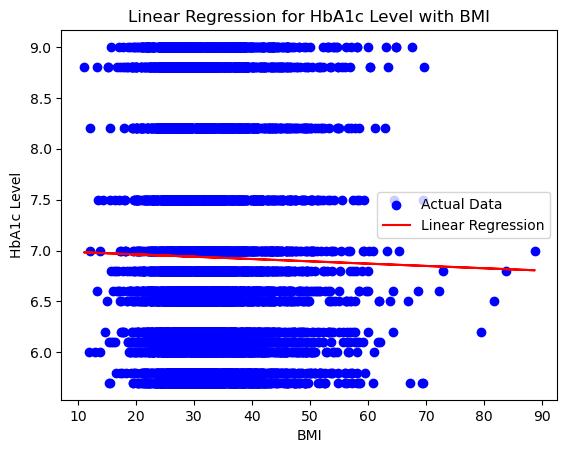

In [90]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['HbA1c_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['HbA1c_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('Linear Regression for HbA1c Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Conclusions about relationships between variables

In [ ]:
# t-tests
# 32 and up -average
# 31 and below - average

In [ ]:
# Age(x axis) vs diabetes

In [ ]:
# 1 t-test 32bmi vs the population


In [ ]:
# Anova Testing